In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,SGDClassifier,SGDRegressor,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,classification_report
import joblib as joblib

In [226]:
#load csv file 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/0a4a1b7c052ef7e81e77604796cc3429b1763db7/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [227]:
df.shape

(30, 17)

In [228]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

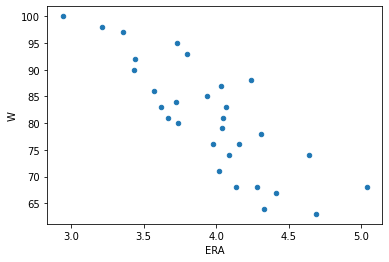

In [229]:
df.plot(kind='scatter',x='ERA',y='W')
#Increasing ERA values decrease the win result

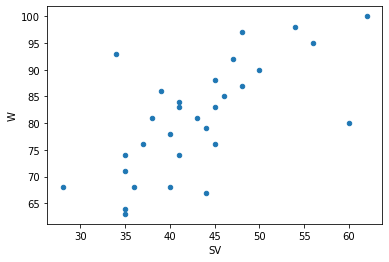

In [230]:
df.plot(kind='scatter',x='SV',y='W')
#when SV value increases, win value also increases 

In [231]:
df.isin([0]).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

In [232]:
#function to replace 0 values with mean
for col in df.columns:
    if(df[col].isin([0]).sum()>0):
        simpleImputer=SimpleImputer(missing_values=0,strategy='mean')
        simpleImputer.fit(df[[col]])
        df[col]=simpleImputer.fit_transform(df[[col]]).ravel()

In [233]:
df.isin([0]).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [234]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.851852,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.501085,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,1.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,2.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.851852,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [235]:
#column W,HR,SO,SB are having outlier . Because it has a huge difference in 75% and max .
#

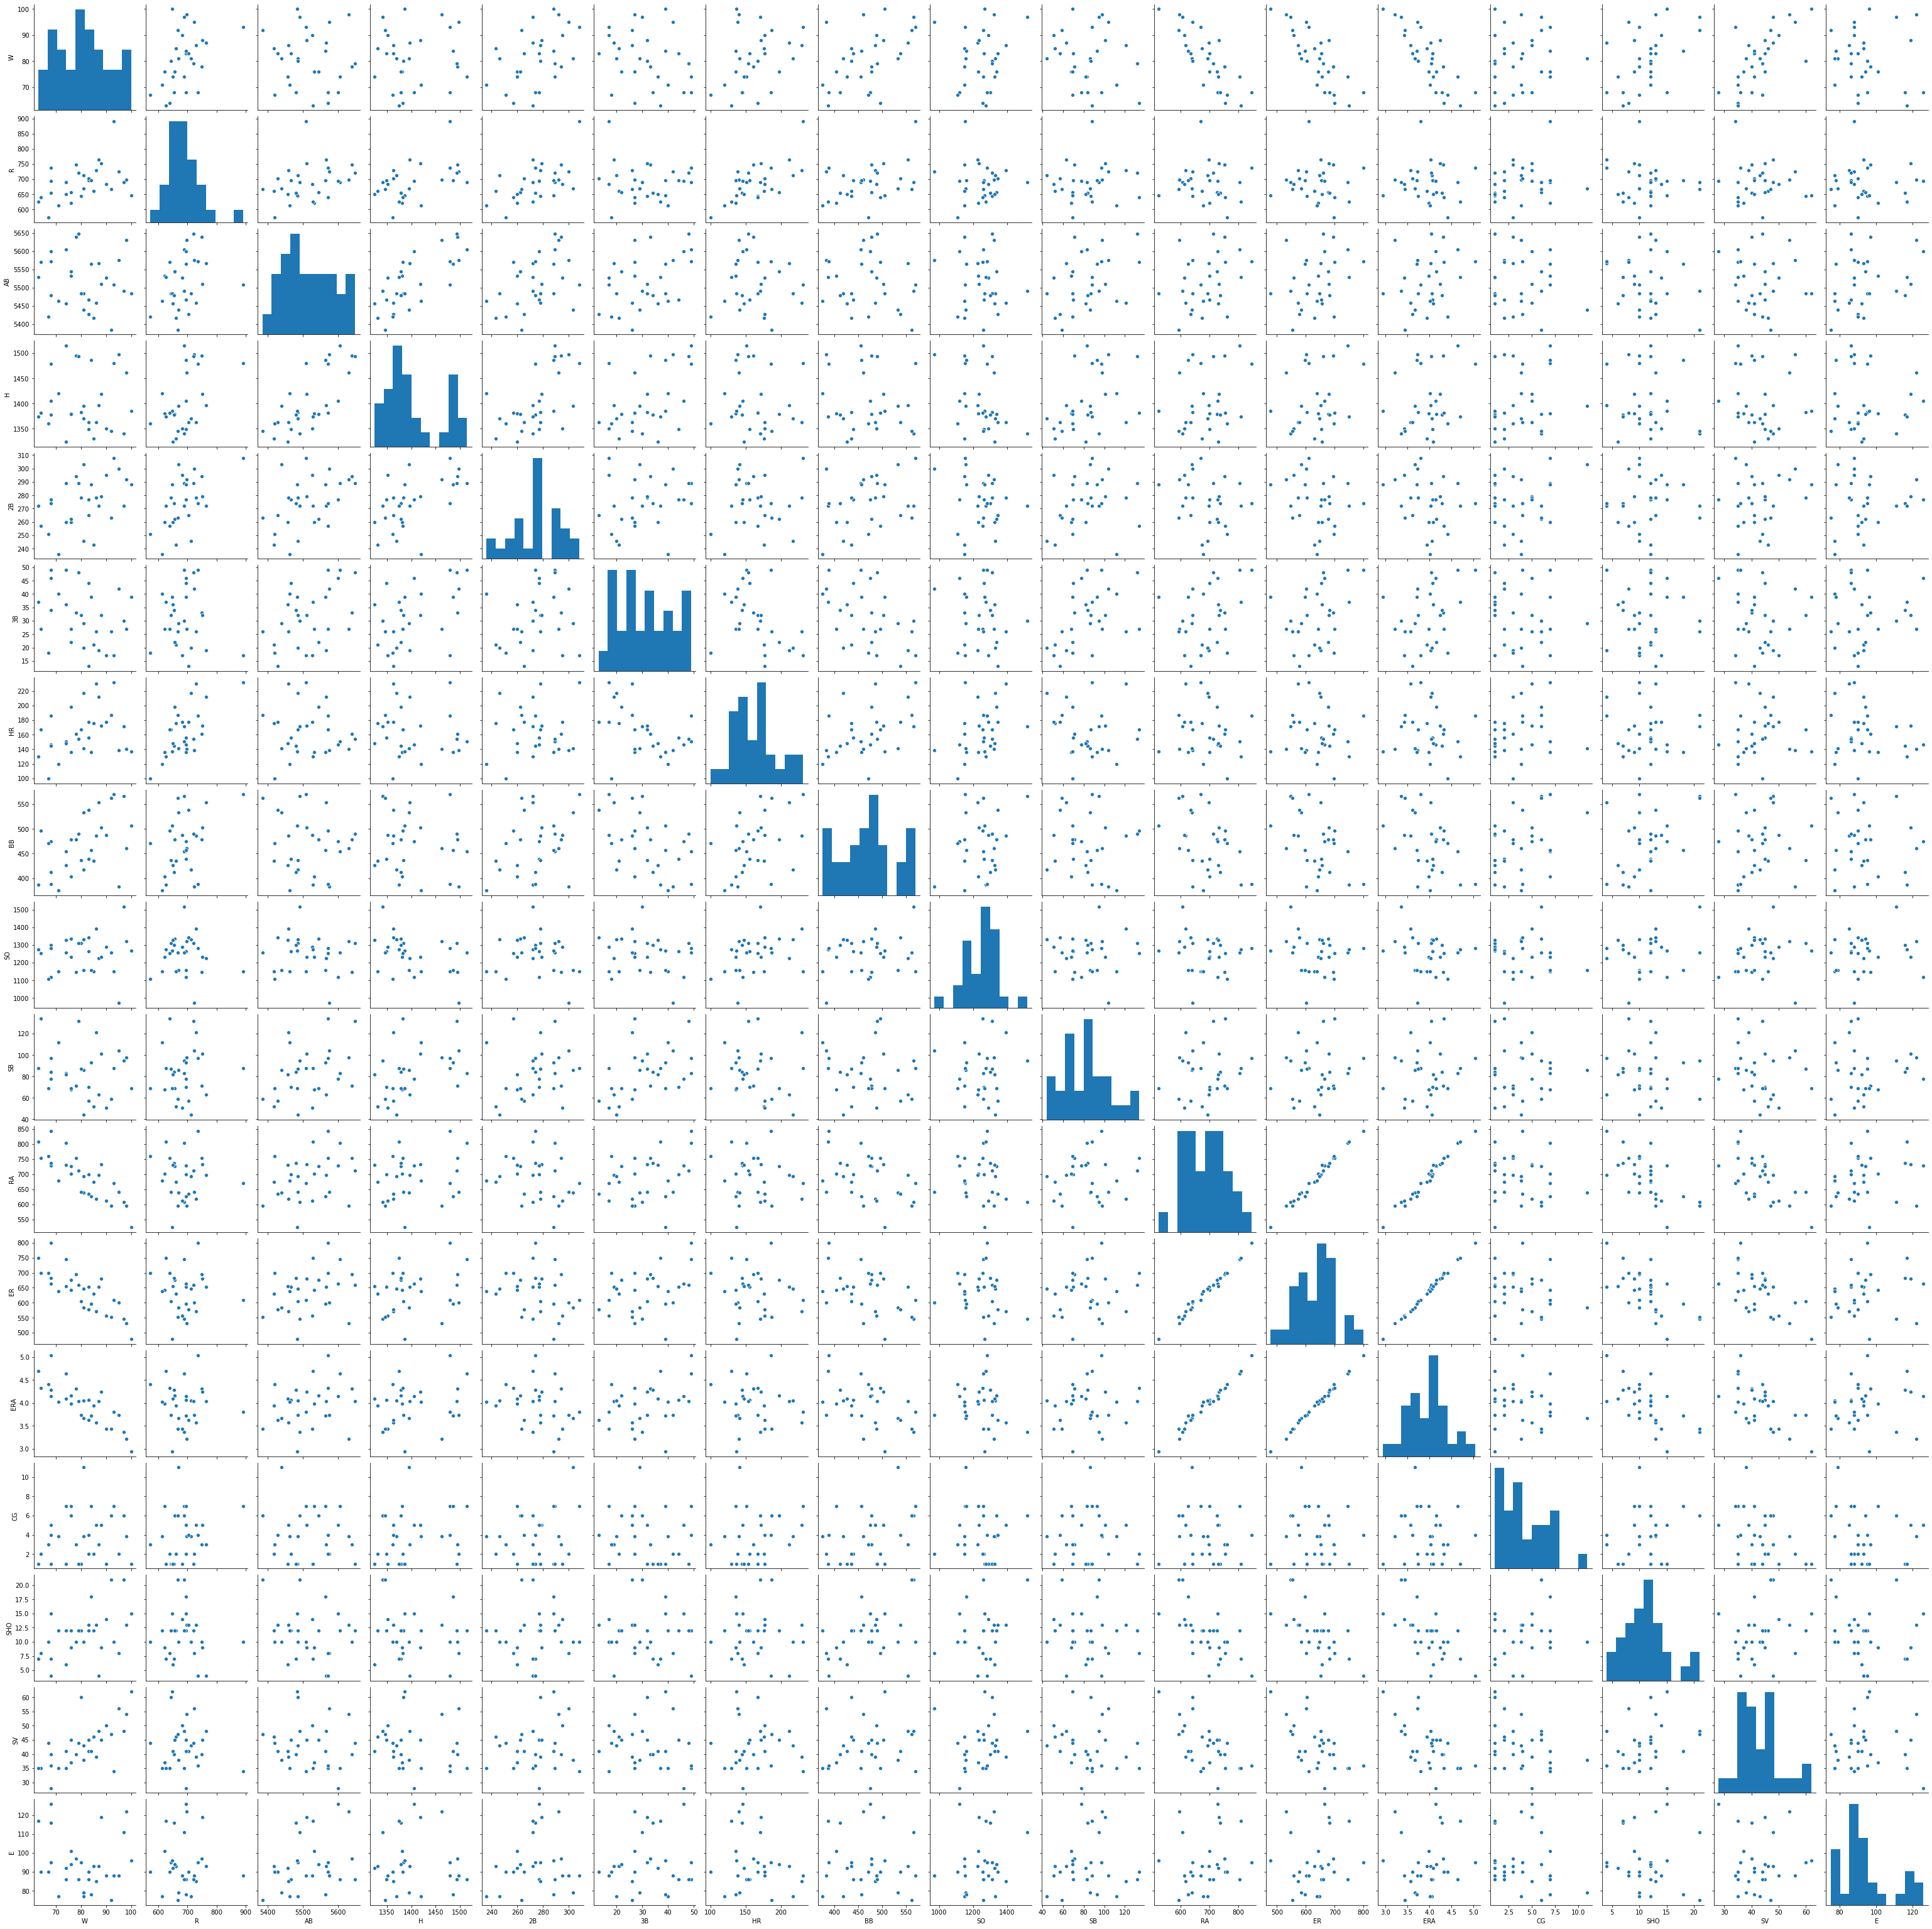

In [236]:
sns.pairplot(data=df)

In [237]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.790410
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [238]:
#function to remove skewed data
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

In [239]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.119573
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

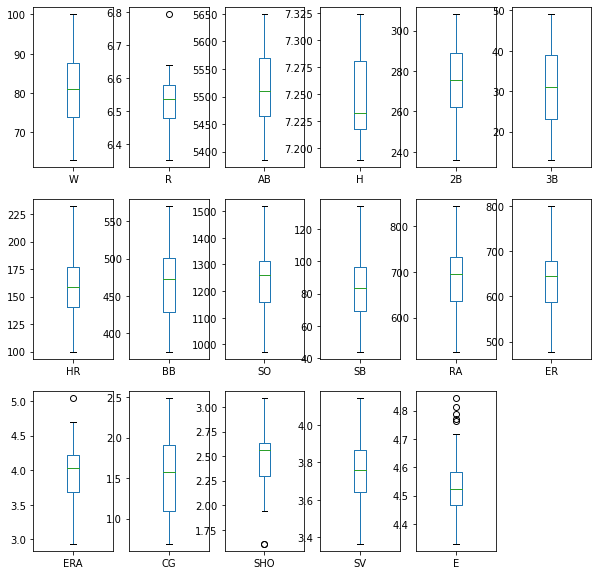

In [240]:
df.plot.box(layout=(3,6),subplots=True,figsize=(10,10))

In [241]:
#Above boxplot shows thr are few outliers present in ERA and E 

In [242]:
#removing outlier
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
6,87,6.639876,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,81,6.570883,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,1.579360,2.397895,3.784190,4.356709
8,80,6.469250,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,78,6.618739,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967
10,88,6.622736,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759,2.302585,3.828641,4.787492


In [243]:
df.shape

(29, 17)

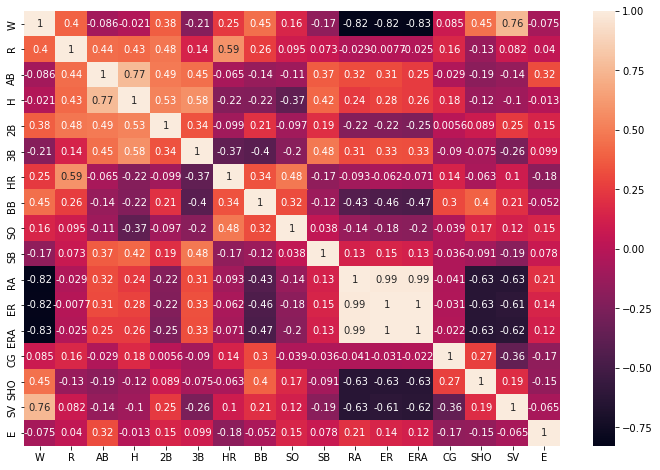

In [244]:
corr_=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_,annot=True)

In [245]:
#removing RA,ER,ERA as these columns are highly -ve corelated with target column W .
df=df.drop(['RA','ER','ERA'],axis=1)

In [246]:
x=df.drop('W',axis=1)
x.shape

(29, 13)

In [247]:
y=df.iloc[:,1]
y.shape

(29,)

In [248]:
sc=StandardScaler();
x=sc.fit_transform(x)
x

array([[ 0.95271901,  0.83008422,  1.72372599,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.62182023,
        -0.72241314,  1.55481209, -0.43573324],
       [ 0.35665907, -0.70283074, -0.94984589,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515, -0.62182023,
         0.31208451,  0.29622875, -0.59810993],
       [-0.24123892, -1.10025314, -0.08870013,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805,  2.02668818,
        -0.15787854, -0.67278738, -1.19738162],
       [-1.34193161,  0.23395062, -0.34774692, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  1.25204913,
        -0.42600884, -0.82526317,  0.53829069],
       [ 0.20390224,  1.25589393,  2.03070817,  0.90831897,  1.70409425,
        -0.35329291, -0.19749523,  0.07293472, -0.01512442,  1.25204913,
         0.31208451, -1.14263711, -0.59810993],
       [ 1.7654624 ,  0.716534

In [249]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [250]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [251]:
lr=LinearRegression()

params_={'kernel':['rbf','linear','poly']}
svr=SVR()
print("svr best param :",findBestParam(svr,params_))
svr=SVR(kernel='poly')

svr best param : {'kernel': 'poly'}


In [252]:

params_={'criterion':['mse','friedman_mse','mae'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeRegressor()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))
dtree_reg=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10)

dtree_reg best param : {'criterion': 'mse', 'max_depth': 2}


In [253]:

params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsRegressor()
print("kn_reg best param :",findBestParam(kn_reg,params_))
kn_reg=KNeighborsRegressor(n_neighbors=5)

kn_reg best param : {'n_neighbors': 5}


In [254]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0]}
lasso_reg=Lasso()
print("lasso_reg best param :",findBestParam(lasso_reg,params_))
lasso_reg=Lasso(alpha=0.0001)

lasso_reg best param : {'alpha': 0.0001}


In [255]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0]}
ridge_reg=Ridge()
print("ridge_reg best param :",findBestParam(ridge_reg,params_))
ridge_reg=Ridge(alpha=0.0001)

ridge_reg best param : {'alpha': 0.0001}


In [256]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDRegressor()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))
sgd_reg=SGDRegressor(alpha=1.0,penalty='l1')

sgd_reg best param : {'alpha': 1.0, 'penalty': 'l1'}


In [257]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0]}
elas_reg=ElasticNet()
print("elasticnet_reg best param :",findBestParam(elas_reg,params_))
elas_reg=ElasticNet(alpha=0.0001)

elasticnet_reg best param : {'alpha': 0.0001}


In [258]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
gradient_reg=GradientBoostingRegressor()
print("gradient_reg best param :",findBestParam(gradient_reg,params_))
gradient_reg=GradientBoostingRegressor(learning_rate=0.1)

gradient_reg best param : {'learning_rate': 0.1}


In [259]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'base_estimator':[dtree_reg,kn_reg,lasso_reg,ridge_reg,sgd_reg,elas_reg]}
ada_reg=AdaBoostRegressor()
print("ada_reg best param :",findBestParam(ada_reg,params_))
ada_reg=AdaBoostRegressor(base_estimator=ridge_reg,learning_rate=0.01)

ada_reg best param : {'base_estimator': Ridge(alpha=0.0001), 'learning_rate': 0.1}


In [260]:
params_={'n_estimators':[10,50,100,150,200],'max_depth':[2,5,10,15],'criterion':['mse','mae']}
rand_reg=RandomForestRegressor()
print("rand_reg best param :",findBestParam(rand_reg,params_))


rand_reg best param : {'criterion': 'mae', 'max_depth': 5, 'n_estimators': 10}


In [261]:
rand_reg=RandomForestRegressor(criterion='mae',max_depth=15,n_estimators=10)

In [262]:
models=[]
models.append(('LinearRegression',lr))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('Lasso',lasso_reg))
models.append(('Ridge',ridge_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('ElasticNet',elas_reg))
models.append(('GradientBoostingRegressor',gradient_reg))
models.append(('AdaBoostRegressor',ada_reg))
models.append(('RandomForestRegressor',rand_reg))


In [263]:
#finding and storing matrix model wise
cross_val_list=[]
r2_list=[]
mse_list=[]
mae_list=[]
model_name_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [264]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_list,'mean_squared_error':mse_list,'mean_absolute_error':mae_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mean_squared_error,mean_absolute_error
0,LinearRegression,1.000000,1.000000,3.155444e-30,1.776357e-15
1,SVR,-1.427777,-0.012393,8.651437e-03,7.609459e-02
2,DecisionTreeRegressor,0.456880,0.683694,2.703004e-03,3.124950e-02
3,KNeighborsRegressor,-0.140190,0.637466,3.098048e-03,4.377668e-02
4,Lasso,0.999990,0.999996,3.544117e-08,1.551925e-04
5,Ridge,1.000000,1.000000,2.728778e-12,1.470421e-06
6,SGDRegressor,-11.242212,-1.976948,2.543960e-02,1.411633e-01
7,ElasticNet,0.999997,0.999999,1.006856e-08,8.271807e-05
8,GradientBoostingRegressor,0.749853,0.803588,1.678443e-03,2.182320e-02
9,AdaBoostRegressor,1.000000,1.000000,1.312483e-10,9.427069e-06


In [265]:
#from above output Ridge model has high r2_Score,cross_val_Score and less square and absolute error
#store model in file
joblib.dump(ridge_reg,'Base_Ball_Win_Pred.pkl')
df_y_pred=pd.DataFrame(y_pred)
df_y_pred.to_csv('Base_Ball_Win_Pred.csv')